In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree # For working with a decision tree
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Ensemble technique --> Random Forest model
# Hyperparameter tuning techniques --> Grid Search CV, Randomized Search CV

In [ ]:
# sex --> 1 - M, 0 - F
# cp --> chest pain (0,1,2,3)
# trestbps --> When a patient is resting, what's his blood pressure
# chol --> cholestrol level
# fbs --> Blood sugar level when the person is fasting
# restecg --> when a person is resting, what's his ecg
# thalach --> Maximum heart rate achieved
# exang --> Exercise Induce Angena, chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP
# oldpeak --> these are values of crest and trough of ecg
# slope --> slope values
# ca --> Maximum no. of major blood vessels --> 0,1,2,3
# thal --> 0,1,2
#         Genetic disorder
#         0 --> no genetic disorder
#         1 --> genetic disorder(fixed effect) --> cannot be treated
#         2 --> genetic disorder(reversible) --> treated
# target --> whether the person is having a heart disease or not
#       0 --> The person is not having heart disease
#       1 --> The person is having a heart disease

In [ ]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df[df['chol']>300].shape

(43, 14)

In [10]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [11]:
df[(df['chol']>300) & (df['age']>40)].shape

(42, 14)

In [13]:
# stats analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


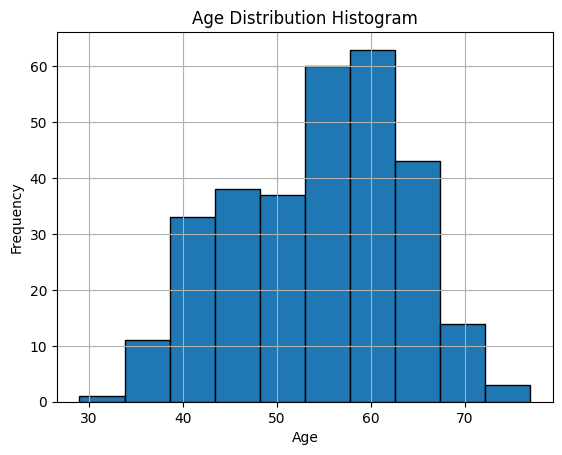

In [15]:
plt.hist(df['age'], bins=10, edgecolor='k')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.show()

<ipython-input-16-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

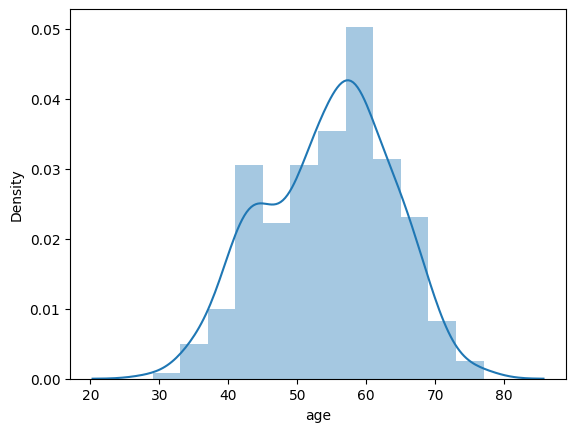

In [16]:
sns.distplot(df['age'])

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

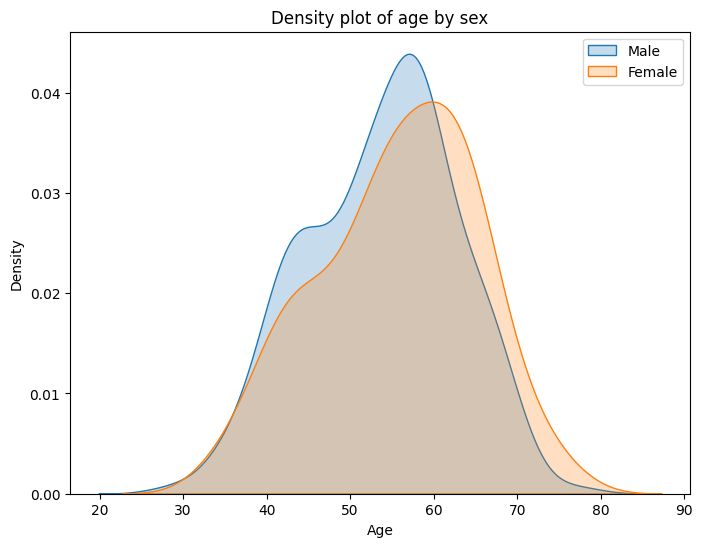

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['sex'] == 1]['age'], label='Male', fill=True)
sns.kdeplot(df[df['sex'] == 0]['age'], label='Female', fill=True)
plt.legend()
plt.title('Density plot of age by sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

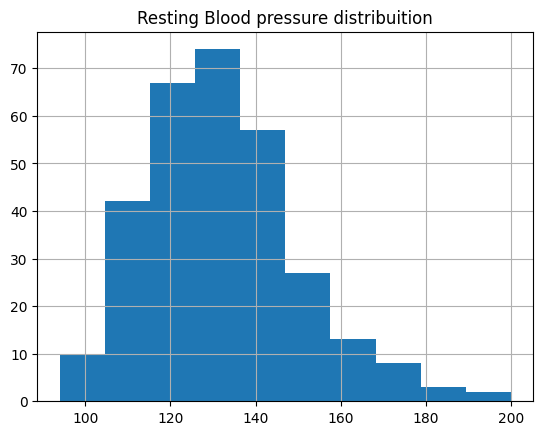

In [20]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

<ipython-input-21-93aaadccc9da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10)


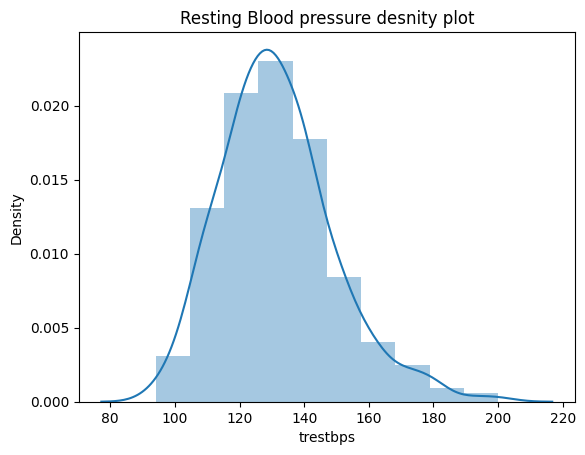

In [21]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above graph, it is almost having a normal distribution

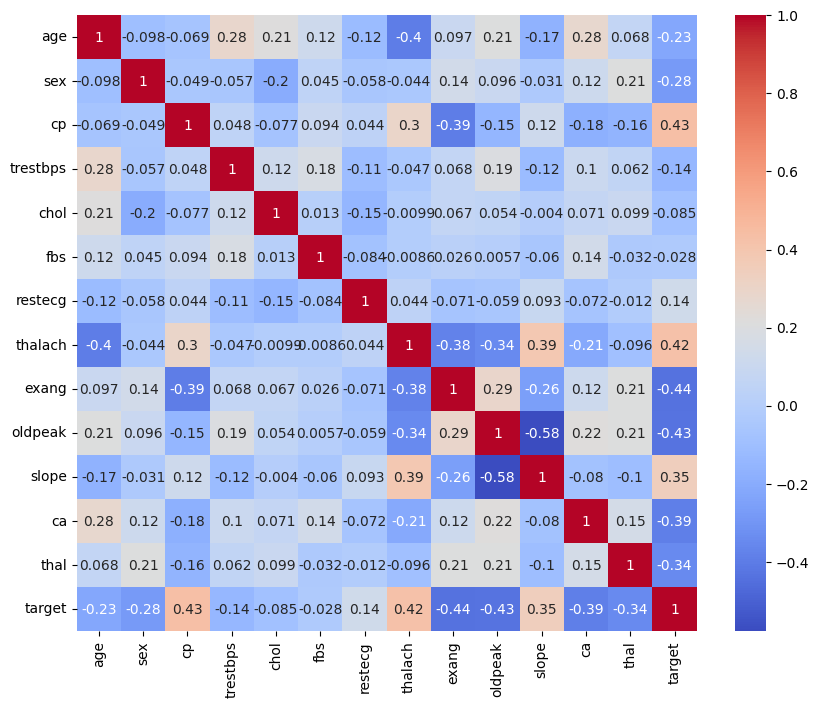

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

<Axes: xlabel='oldpeak'>

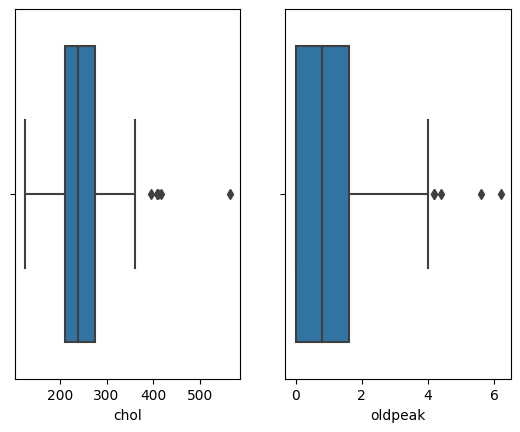

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols=2)  # plt.subplots(2,1)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [ ]:
# Outliers are not that much in these columns
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3-Q1

In [ ]:
# data>=q1-1.5*IQR or data<=q3+1.5*IQR

In [ ]:
#iqr method of handing outliers
#lower limit-- q1-1.5*IQR
#upper limit-- q3+1.5*IQR

In [ ]:
#upper limit-- mean+3*std   # for column-wise
#lower limit-- mean-3*std

Text(0.5, 1.0, 'Count of target feature by sex')

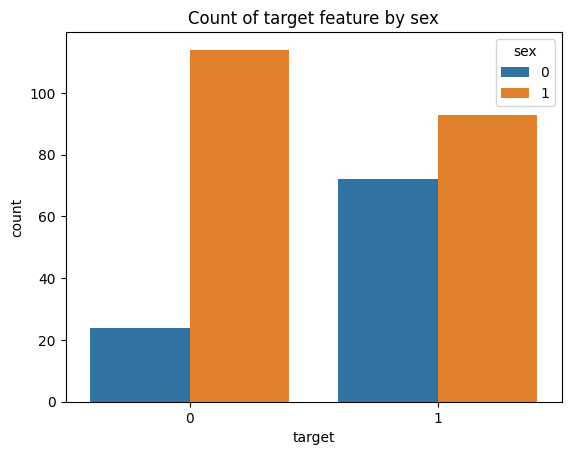

In [25]:
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [27]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe format(2D) data
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=34, train_size=0.7)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [ ]:
# DecisionTreeClassifier -- work with classification problem
# DecisionTreeRegressor-- work with regression problem
# CART --> Classification And Regression Tree

In [30]:
clf = tree.DecisionTreeClassifier() #we are creating a decision tree model which is untrained
clf.fit(x_train,y_train) # training the model

DecisionTreeClassifier()

In [31]:
#testing the model--
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [32]:
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [33]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [34]:
y_test

56     1
297    0
262    0
170    0
74     1
      ..
298    0
249    0
229    0
80     1
79     1
Name: target, Length: 91, dtype: int64

In [35]:
#print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Test score 0.8241758241758241


In [37]:
accuracy_score(y_train_pred,y_train)

1.0

In [38]:
confusion_matrix(y_test_pred,y_test)

array([[33,  9],
       [ 7, 42]])

In [ ]:
# HYPERPARAMETER TUNING --> GridSearchCV, RandomizedSearchCV
# Boosting techniques --> XGboost, AdaBoost, GradientBoosting

# When we talk about improving the performance of a decision Tree --> Random Forest


In [ ]:
#               Acutal Values
#Predicted        1   0
#             1  TP  FP
#             0  FN  TN

In [39]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=['max_depth', 'accuracy'])
df1

,max_depth,accuracy


In [ ]:
#for the 1st loop, input_parameter will be having the value 1
#inside the for loop, it will create a dt model with 1 as the max depth value:
#model = tree.DecisionTreeClassifier(max_depth=1)

In [40]:
for input_parameter in c_parameter_values:  #for i in c_parameter_values
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
df1

<ipython-input-40-4bc31a9d9c84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-40-4bc31a9d9c84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-40-4bc31a9d9c84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
<ipython-input-40-4bc31a9d9c84>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append({'max_depth' : input_para

,max_depth,accuracy
0,1.0,76.923077
1,2.0,79.120879
2,3.0,84.615385
3,4.0,80.219780
4,5.0,81.318681
5,6.0,83.516484
6,7.0,82.417582
7,8.0,82.417582
8,9.0,81.318681
9,10.0,81.318681


In [41]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [42]:
acc_score

84.61538461538461

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.84      0.88      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives.
#Thus, for all the people who actually have heart disease,
#recall tells us how many were correctly identified as a heart patient.

#precision of class 0 = TP of class 0/total number of object
#What is the Precision for our model?
#Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object
#Layman definition: Of all the positive predictions I made, how many of them are truly positive?


#macro average = (precision of class 0 + precision of class 1)/2

#weighted average is precision of all classes merged together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)

# F1-score is a measure of a model's accuracy on a dataset
# Accuracy tells you how many times the ML model was correct overall.
# Precision is how good the model is at predicting a specific category.
# Recall tells you how many times the model was able to detect a specific category.